**Import needed libraries**

In [146]:
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import plotly_express as px
import matplotlib.pyplot as plt




warnings.filterwarnings('ignore')

## 1 - Getting started

This project will be centered around the Chicago Crime & selected Census data. Start of by downloading both datasets.

**1.1** Read through the documentation for both datasets. Do this *thoroughly*!

Chicago crime data : https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2

Chicago census data : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2



**1.2** Now download both datasets as .csv files. You get the option to download by frist clicking on the 'Export' tab. Make sure you select the data in CSV format.

Be mindful that the crime dataset is over 2GB in size, so it might take awhile to download.

Once downloaded, rename the files chicago_crime.csv & chicago_census.csv, respectively, and put them in the same folder as this notebook.

**1.3** Load data. The following reads should now work.

In [3]:
chicago_crime_2001_to_2024_df = pd.read_csv('chicago_crime.csv')
chicago_census_2008_to_2012_df = pd.read_csv('chicago_census.csv')

**1.4** The census data only contains records that apply for the period 2008-2012, while the crime dataset runs from 2001-2024. 

Therefore, begin by filtering the crime data so that you get a dataframe that contains records only for the period 2008-2012. 

*Hint*: You'll be filtering based on date quite alot in this project, and it's therefore very advisable to transform the existing *Date* column into datetime-format. 

To simplify further, you could perhaps also create new columns that indicate *Year*, *Month*, *Day* and *Hour*. 

You might also find that other types of indicator columns could be useful. Feel free to come back and add them here later.

**Important:** For the remainder of this project, we will only work with data for the year 2008-2012.

In [4]:
# Convert the 'Date' column to datetime format

chicago_crime_2001_to_2024_df['Date'] = pd.to_datetime(chicago_crime_2001_to_2024_df["Date"], format="%m/%d/%Y %I:%M:%S %p")


In [5]:
# create a new dataframe with crime records only the period 2008-2012

year_2008_to_2012_filter = chicago_crime_2001_to_2024_df["Date"].dt.year.between(2008, 2012)

chicago_crime_2008_to_2012_df = chicago_crime_2001_to_2024_df[year_2008_to_2012_filter].reset_index(drop=True)

chicago_crime_2008_to_2012_df["Month"] = chicago_crime_2008_to_2012_df["Date"].dt.month
chicago_crime_2008_to_2012_df["Day"] = chicago_crime_2008_to_2012_df["Date"].dt.day
chicago_crime_2008_to_2012_df["Hour"] = chicago_crime_2008_to_2012_df["Date"].dt.hour
chicago_crime_2008_to_2012_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Hour
0,12416974,JE293464,2011-08-10 00:01:00,031XX W 53RD PL,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,NaN,NaN,2011,09/14/2023 03:41:59 PM,NaN,NaN,NaN,8,10,0
1,7648887,HS453773,2010-07-08 09:30:00,054XX S CORNELL AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,False,...,1188189.0,1869081.0,2010,09/02/2024 03:40:51 PM,41.795838,-87.585429,"(41.795837911, -87.585429397)",7,8,9
2,7823660,HS634379,2010-11-19 09:00:00,076XX S ABERDEEN ST,0320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,1170306.0,1854179.0,2010,09/14/2023 03:41:59 PM,41.755353,-87.651440,"(41.755353249, -87.651440192)",11,19,9
3,11762339,JC354299,2008-07-27 00:01:00,080XX S CHAMPLAIN AVE,0264,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,False,...,NaN,NaN,2008,09/03/2024 03:41:39 PM,NaN,NaN,NaN,7,27,0
4,8029377,HT260540,2011-04-22 02:40:00,063XX S DR MARTIN LUTHER KING JR DR,0420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,RESTAURANT,False,False,...,1180014.0,1862897.0,2011,09/16/2023 03:41:56 PM,41.779060,-87.615597,"(41.779059693, -87.615596501)",4,22,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878946,13083952,JG273833,2010-01-01 12:00:00,048XX W MELROSE ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,True,True,...,NaN,NaN,2010,07/19/2023 03:40:30 PM,NaN,NaN,NaN,1,1,12
1878947,13117080,JG312963,2008-06-22 00:00:00,028XX W 19TH ST,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,HOSPITAL BUILDING / GROUNDS,False,False,...,NaN,NaN,2008,06/24/2023 03:40:29 PM,NaN,NaN,NaN,6,22,0
1878948,13055617,JG239642,2012-10-01 00:00:00,025XX W ARDMORE AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,...,NaN,NaN,2012,04/28/2023 03:41:34 PM,NaN,NaN,NaN,10,1,0
1878949,13078984,JG267931,2011-01-01 00:00:00,035XX W 74TH ST,1753,OFFENSE INVOLVING CHILDREN,SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER,RESIDENCE,False,True,...,NaN,NaN,2011,05/21/2023 03:42:00 PM,NaN,NaN,NaN,1,1,0


# 2 - Cleaning up the mess

**Note:** The rest of the problems don't really require you to finish this section - you could revisit these questions at a later time. 

Bear in mind though that the numbers you aquire in the problems ahead may or may not change a bit, depending on how you choose to treat the duplicates and missing values here.  

**2.1** How many duplicated rows are there in crime data set? If there are any, remove them.

<font color="green">**I've found 47 dublicated rows, but they were all Homicide so my conclusion is that it's not duplicates but multiple victims**</font>

**2.2** What columns in the crime dataset has missing values, and how many are they?

<font color="green">**The columns that have missing dataset is:** 
<ul>
    <li>Location Description     (1051) missing values</li>
    <li>District                   (40) missing values</li>
    <li>Ward                       (46) missing values</li>
    <li>Community Area            (854) missing values</li>
    <li>X Coordinate            (16327) missing values</li>
    <li>Y Coordinate            (16327) missing values</li>
    <li>Latitude                (16327) missing values</li>
    <li>Longitude               (16327) missing values</li>
    <li>Location                (16327) missing values</li>
</ul></font>

**2.3** Now, for all the columns with missing values you identified, chose one of the following:

        a) remove the entire row with the missing value
        b) replace the missing values with another suitable value
        c) don't do anything, leave the missing values as is

All options above are completely valid! However, I want you to, for all columns with missing values, **clearly** argue for why you chose to do what you do.

In [6]:
pd.set_option("display.max_columns", None)

duplicate_all_column_except_id_filter = chicago_crime_2008_to_2012_df.duplicated(subset=["Case Number", "Date", "Block", "IUCR", "Primary Type", "Description", "Location Description", "Arrest", "Domestic", "Beat",
       "District", "Ward", "Community Area", "FBI Code", "X Coordinate",
       "Y Coordinate", "Year", "Updated On", "Latitude", "Longitude",
       "Location", "Month", "Day", "Hour"])
len(chicago_crime_2008_to_2012_df[duplicate_all_column_except_id_filter])
chicago_crime_2008_to_2012_df[duplicate_all_column_except_id_filter].sort_values(by="Case Number")["Primary Type"].values

array(['HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE', 'HOMICIDE',
       'HOMICIDE', 'HOMICIDE'], dtype=object)

In [7]:
chicago_crime_2008_to_2012_df.isnull().sum()

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description     1051
Arrest                      0
Domestic                    0
Beat                        0
District                   40
Ward                       46
Community Area            854
FBI Code                    0
X Coordinate            16327
Y Coordinate            16327
Year                        0
Updated On                  0
Latitude                16327
Longitude               16327
Location                16327
Month                       0
Day                         0
Hour                        0
dtype: int64

## 3 - The Birds Eye

**3.1** Do some exploratory analysis on the dataset and try to get a sense of the data you're working with.

**3.1** How many crimes records exists for the period 2008-2012, in total?

<font color="green">**There are 1878951 crimes recorded for the period between 2008-2012**</font>

**3.2** What's the number of recorded crimes each of the years, individually? 

<font color="green">**The number of crimes each year is the following:**
- **2008**: 427198
- **2009**: 392848
- **2010**: 370541
- **2011**: 352020
- **2012**: 336344</font> 


**3.3** Has the number of recorded crimes increased, decreased or remained stable over said period?

The total crime rate seem to be steadily decreasing over the years - as shown above.

**3.4** By how many percentage points has the crime rate increased/decreased over this period? 

Hint: You only need to compare the number of crime records from 2008 with the number of crime records from 2012.

<font color="green"> The crime rate have decreased from 2008 til 2012 by ≈ 21,3%</font>

**3.5** Which primary crime types have increasing crime rates, and which ones have decreasing crime rates, when comparing 2008 to 2012?

<font color="green">Here is two lists of crime rates that have increased and decreased:
>**Increasing:**
<ul>
    <li>INTERFERENCE WITH PUBLIC OFFICER</li>
    <li>WEAPONS VIOLATION</li>               
    <li>CRIMINAL SEXUAL ASSAULT</li>             
    <li>STALKING</li>                          
    <li>PUBLIC INDECENCY</li>                    
    <li>OBSCENITY</li>                           
    <li>NON-CRIMINAL</li>                          
    <li>NON-CRIMINAL (SUBJECT SPECIFIED)</li>       
    <li>HOMICIDE</li>
</ul>   
              
>**Decreasing:**
<ul>
    <li>PUBLIC PEACE VIOLATION</li>
    <li>OTHER NARCOTIC VIOLATION</li>               
    <li>INTIMIDATION </li>             
    <li>CRIM SEXUAL ASSAULT</li>                          
    <li>KIDNAPPING</li>                    
    <li>ARSON </li>                           
    <li>OFFENSE INVOLVING CHILDREN</li>                          
    <li>LIQUOR LAW VIOLATION</li>       
    <li>SEX OFFENSE</li>
    <li>GAMBLING</li>               
    <li>DECEPTIVE PRACTICE </li>             
    <li>MOTOR VEHICLE THEFT</li>                          
    <li>PROSTITUTION</li>                    
    <li>ROBBERY</li>                           
    <li>BURGLARY</li>                          
    <li>CRIMINAL TRESPASS</li>       
    <li>ASSAULT</li>
    <li>OTHER OFFENSE</li>                          
    <li>NARCOTICS</li>       
    <li>THEFT</li>
    <li>BATTERY</li>
    <li>CRIMINAL DAMAGE</li>
</ul>

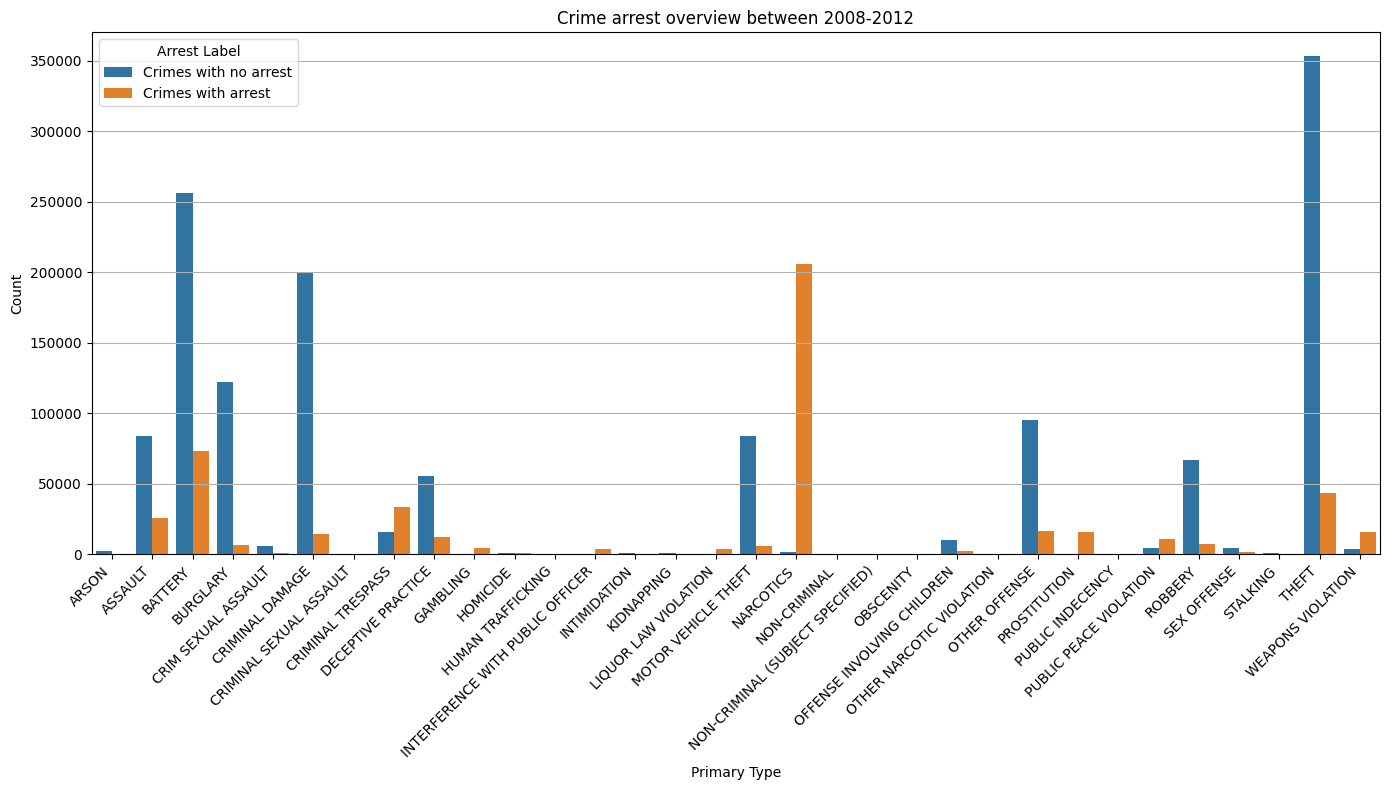

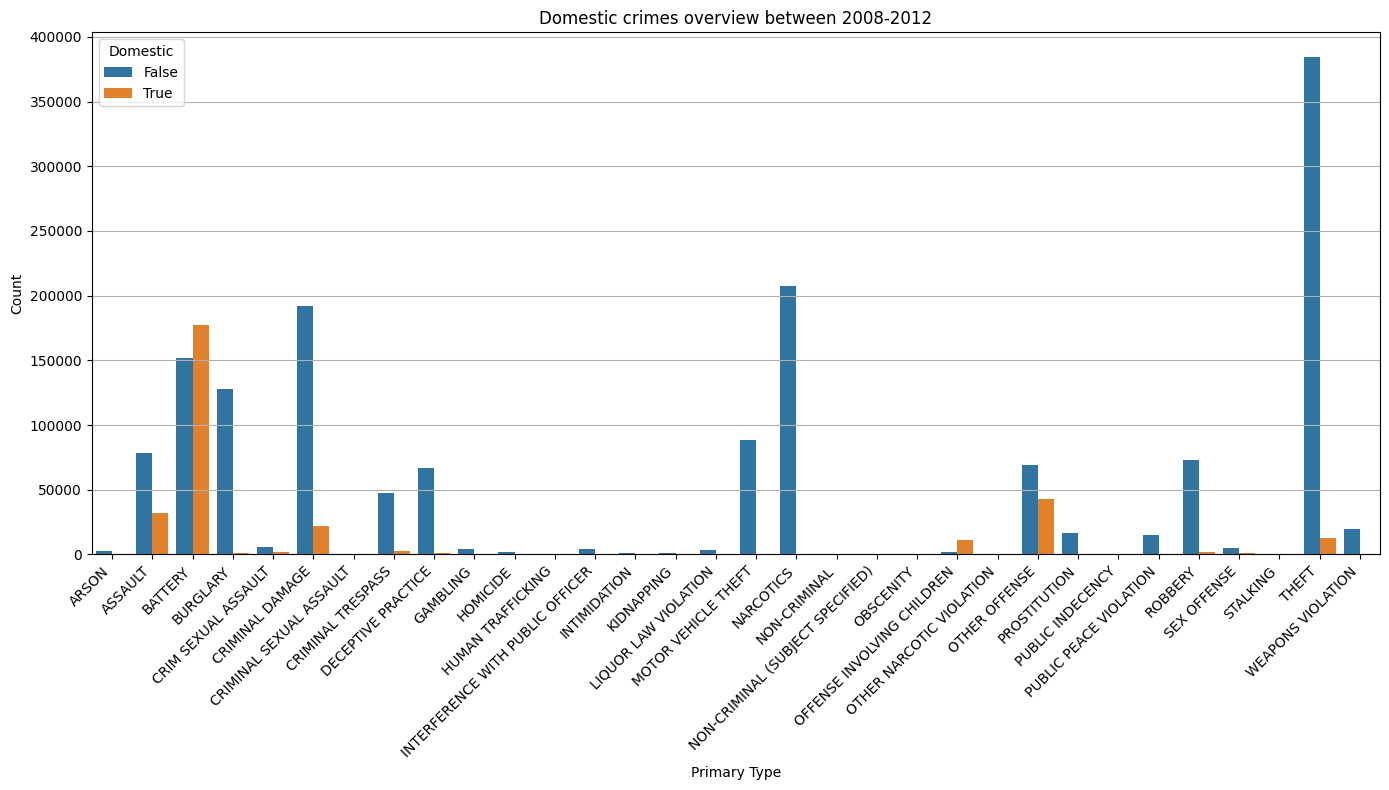

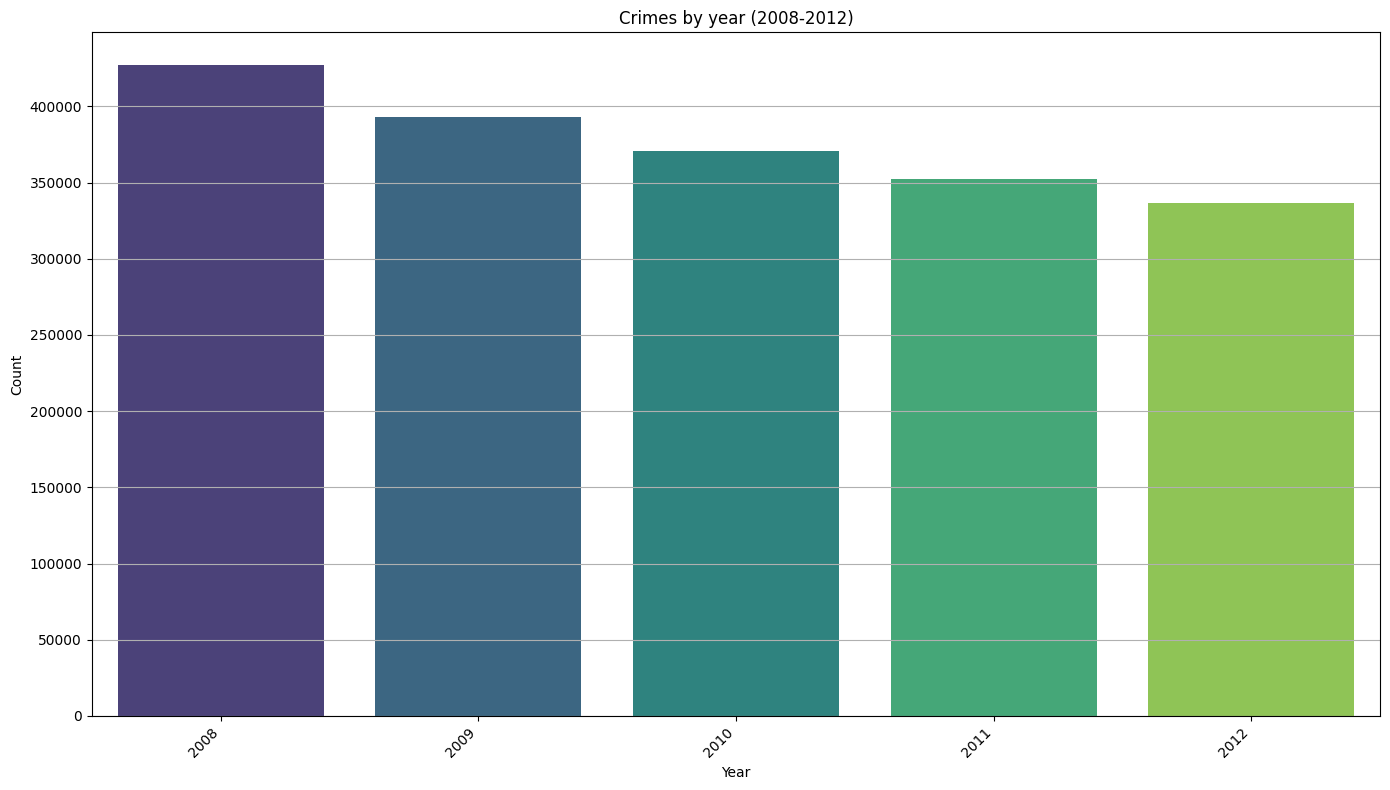

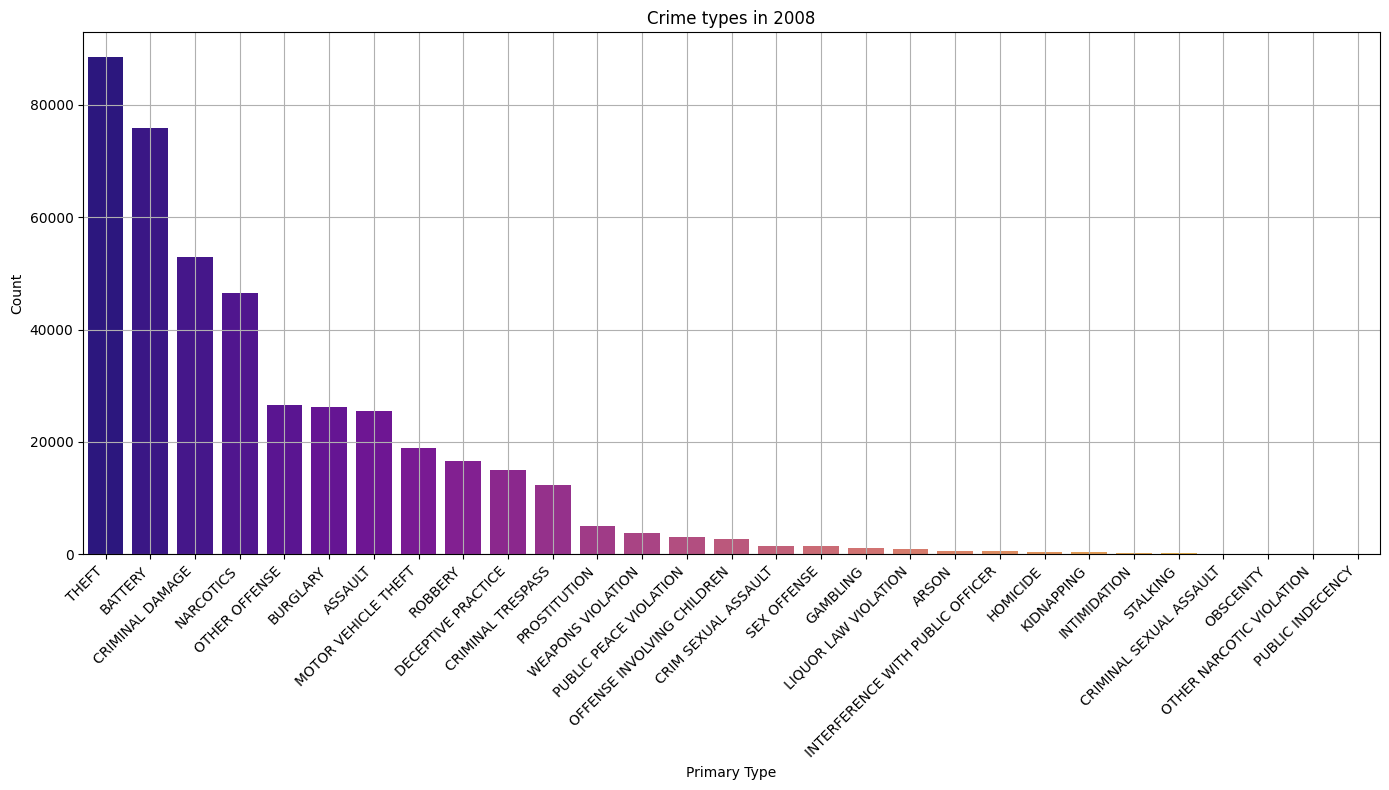

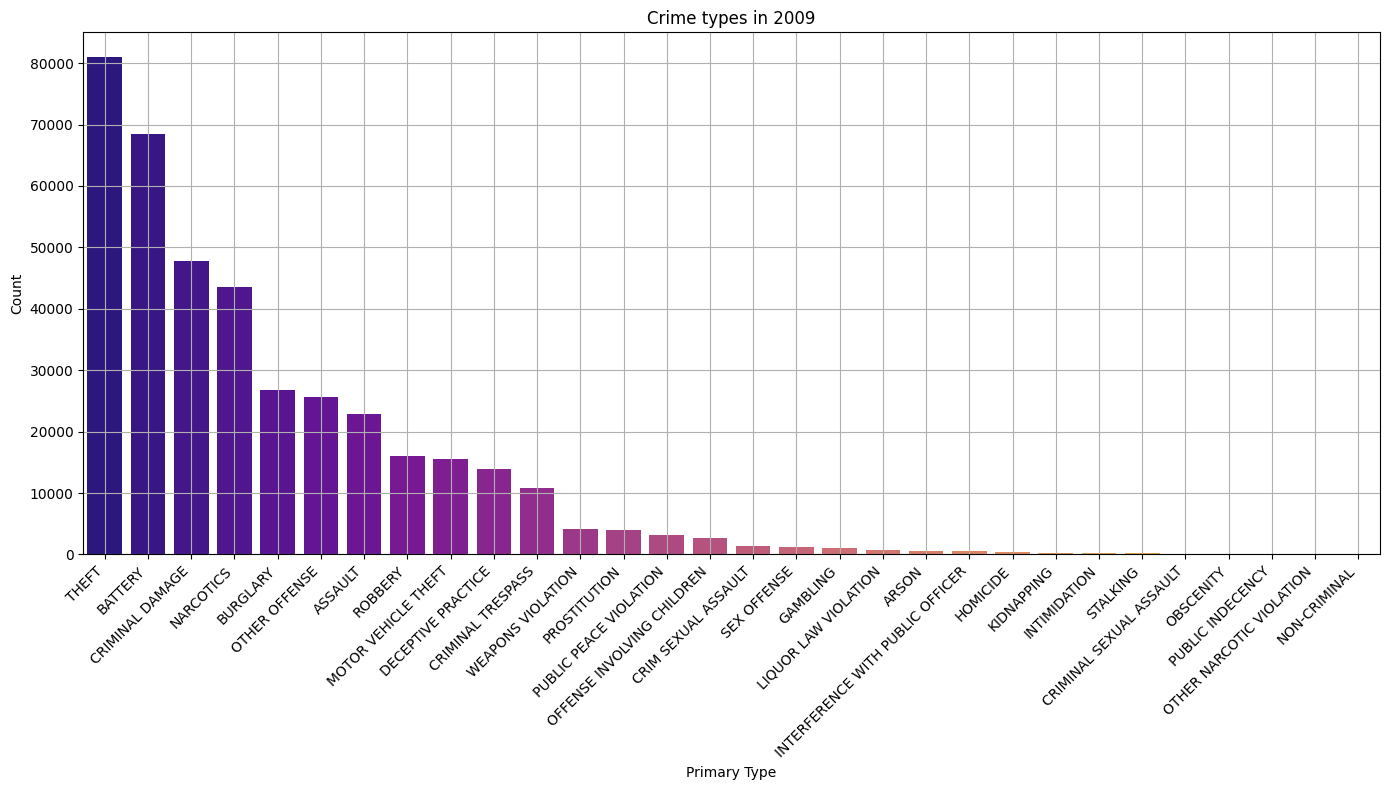

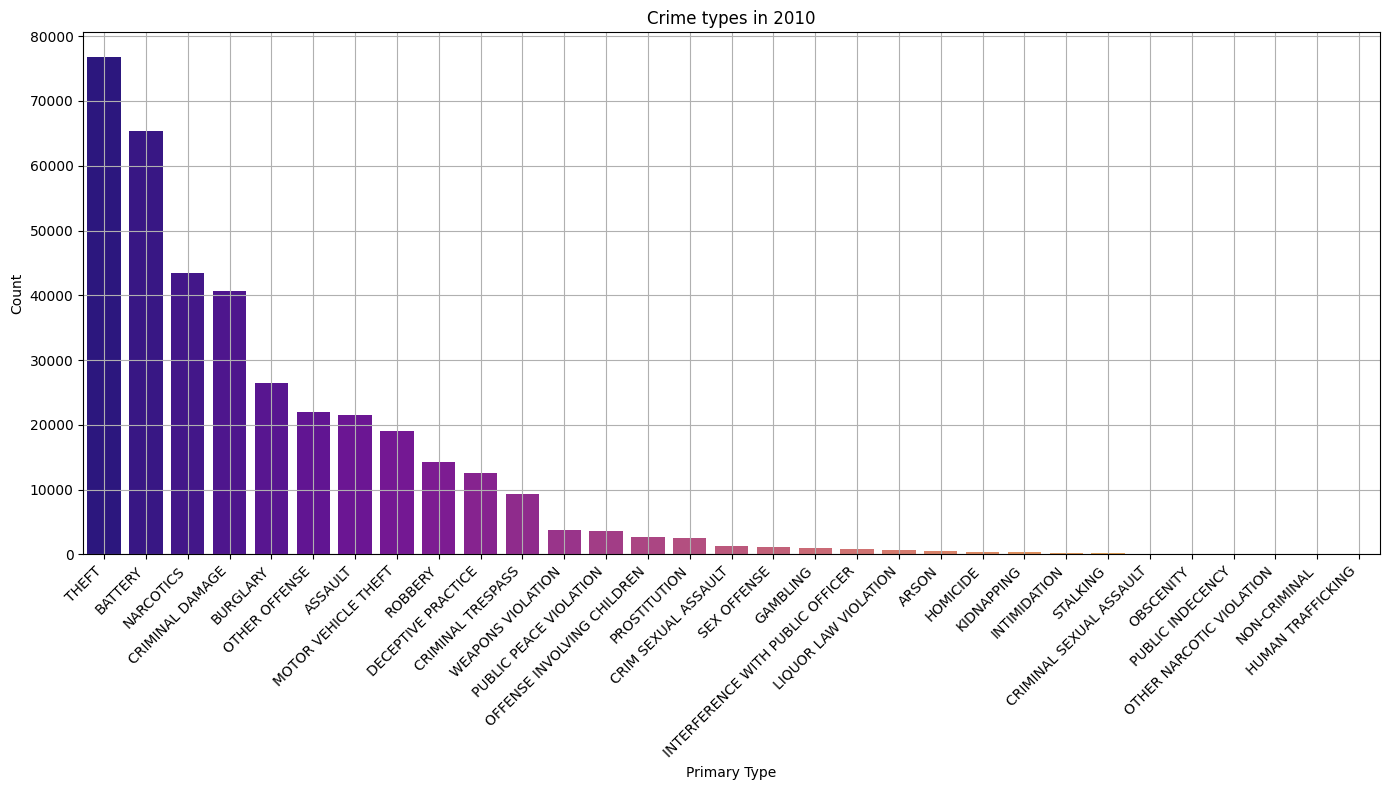

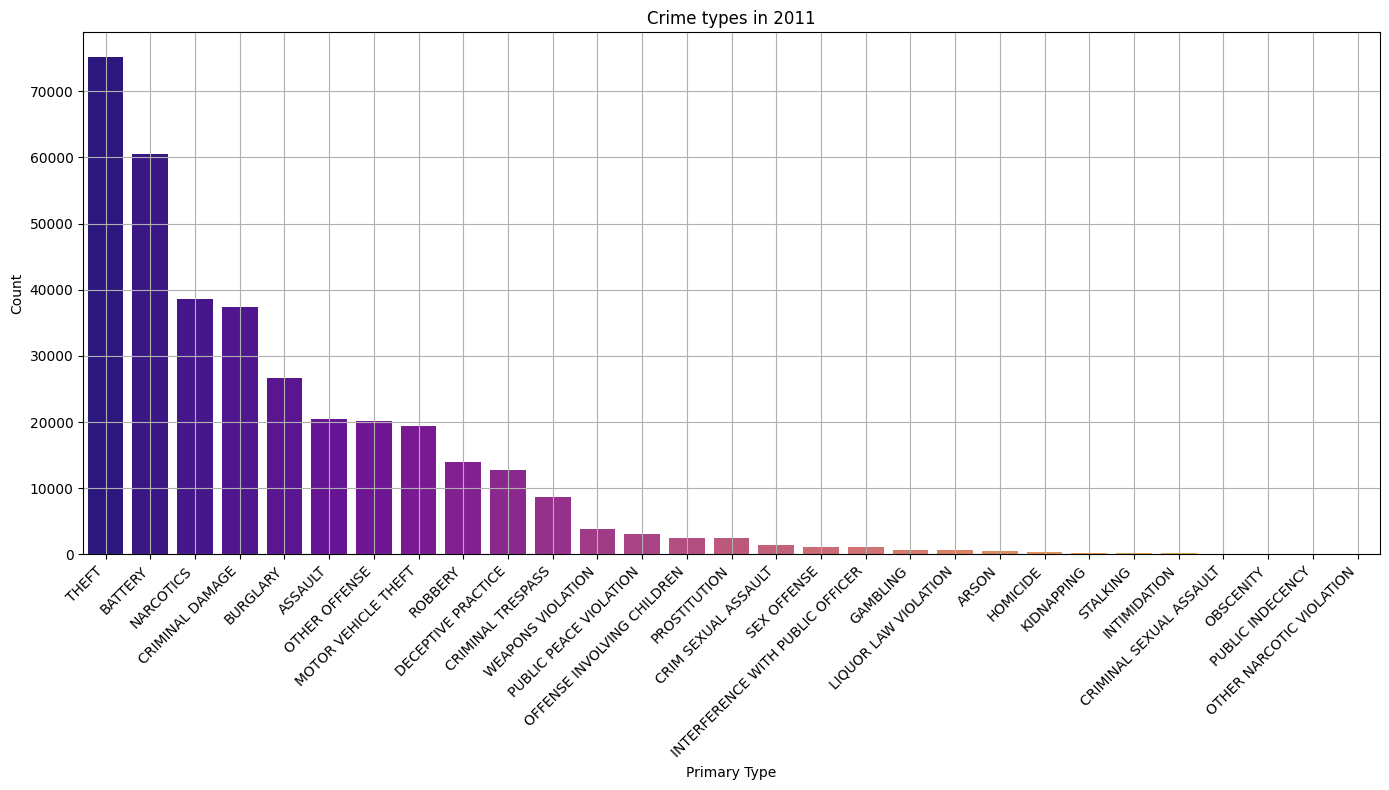

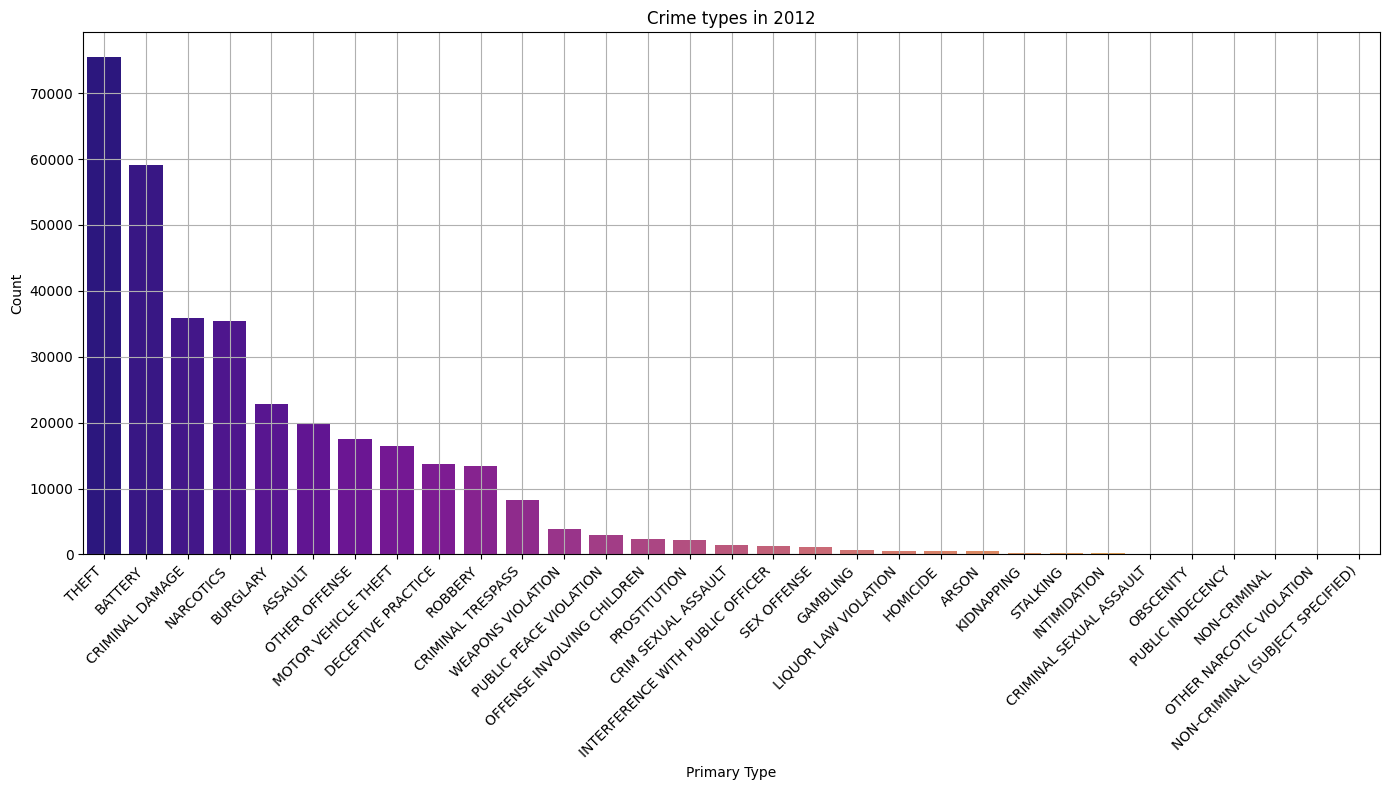

In [8]:
crime_stats = chicago_crime_2008_to_2012_df.groupby(["Primary Type", "Arrest"]).size().reset_index(name="Count")
crime_stats["Arrest Label"] = crime_stats["Arrest"].map({True: "Crimes with arrest", False: "Crimes with no arrest"})

plt.figure(figsize=(14, 8))
sns.barplot(data=crime_stats, x="Primary Type", y="Count", hue="Arrest Label")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.ylim(0, 370000)
plt.title("Crime arrest overview between 2008-2012")
plt.tight_layout()
plt.show()

crime_domestic_stats = chicago_crime_2008_to_2012_df.groupby(["Primary Type","Domestic"]).size().reset_index(name="Count")

plt.figure(figsize=(14, 8))
sns.barplot(data=crime_domestic_stats, x="Primary Type", y="Count", hue="Domestic")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.title("Domestic crimes overview between 2008-2012")
plt.tight_layout()
plt.show()

crime_by_year = chicago_crime_2008_to_2012_df.groupby("Year").size().reset_index(name="Count")

plt.figure(figsize=(14, 8))
sns.barplot(data=crime_by_year, x="Year", y="Count", palette="viridis")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.title("Crimes by year (2008-2012)")
plt.tight_layout()
plt.show()

for year in range(2008, 2013):
    yealy_crime = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == year]
    crime_counts = yealy_crime["Primary Type"].value_counts().reset_index()
    crime_counts.columns = ["Primary Type", "Count"]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=crime_counts, x="Primary Type", y="Count", palette="plasma")
    plt.title(f"Crime types in {year}")
    plt.xticks(rotation=45, ha="right")
    plt.grid()
    plt.tight_layout()
    plt.show()

In [9]:
print(f"Crimes recorded between 2008 and 2012: {chicago_crime_2008_to_2012_df.groupby("Year").size().sum()}")
print(f"Recorded crimes each of the years:\n {chicago_crime_2008_to_2012_df.groupby("Year").size()}")

year_2008 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2008].shape[0]
year_2012 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2012].shape[0]

crime_percentage_change = ((year_2012 - year_2008) / year_2008) * 100
print(f"The crime rate have decreased by {crime_percentage_change}%")

Crimes recorded between 2008 and 2012: 1878951
Recorded crimes each of the years:
 Year
2008    427198
2009    392848
2010    370541
2011    352020
2012    336344
dtype: int64
The crime rate have decreased by -21.2674216639591%


In [10]:
yearly_crime_counts = chicago_crime_2008_to_2012_df.groupby(["Primary Type", "Year"]).size().reset_index(name="Count")
yearly_crime_counts = yearly_crime_counts.sort_values(by=["Primary Type", "Year"])

for crime_type in yearly_crime_counts["Primary Type"].unique():
    print(f"Crime counts for {crime_type}:")
    crime_data = yearly_crime_counts[yearly_crime_counts["Primary Type"] == crime_type]
    print(crime_data)
    print("\n" + "-"*40 + "\n")


Crime counts for ARSON:
  Primary Type  Year  Count
0        ARSON  2008    644
1        ARSON  2009    616
2        ARSON  2010    522
3        ARSON  2011    504
4        ARSON  2012    469

----------------------------------------

Crime counts for ASSAULT:
  Primary Type  Year  Count
5      ASSAULT  2008  25448
6      ASSAULT  2009  22861
7      ASSAULT  2010  21537
8      ASSAULT  2011  20411
9      ASSAULT  2012  19899

----------------------------------------

Crime counts for BATTERY:
   Primary Type  Year  Count
10      BATTERY  2008  75930
11      BATTERY  2009  68459
12      BATTERY  2010  65402
13      BATTERY  2011  60460
14      BATTERY  2012  59133

----------------------------------------

Crime counts for BURGLARY:
   Primary Type  Year  Count
15     BURGLARY  2008  26218
16     BURGLARY  2009  26767
17     BURGLARY  2010  26422
18     BURGLARY  2011  26620
19     BURGLARY  2012  22844

----------------------------------------

Crime counts for CRIM SEXUAL ASSAULT:
   

In [11]:
crime_2008_2012 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"].isin([2008, 2012])]
crime_counts = crime_2008_2012.groupby(["Primary Type", "Year"]).size().unstack(fill_value=0)
crime_counts["Change"] = crime_counts[2012] - crime_counts[2008]
crime_counts_sorted = crime_counts.sort_values(by="Change", ascending=False)
print("Crime comparison between 2008 and 2012:")
print(crime_counts_sorted)

Crime comparison between 2008 and 2012:
Year                               2008   2012  Change
Primary Type                                          
INTERFERENCE WITH PUBLIC OFFICER    580   1228     648
WEAPONS VIOLATION                  3877   3907      30
CRIMINAL SEXUAL ASSAULT              58     81      23
STALKING                            190    207      17
PUBLIC INDECENCY                      4     17      13
OBSCENITY                            13     26      13
NON-CRIMINAL                          0      6       6
NON-CRIMINAL (SUBJECT SPECIFIED)      0      2       2
HOMICIDE                            513    515       2
PUBLIC PEACE VIOLATION             3013   3007      -6
OTHER NARCOTIC VIOLATION             12      6      -6
INTIMIDATION                        261    156    -105
CRIM SEXUAL ASSAULT                1508   1384    -124
KIDNAPPING                          359    235    -124
ARSON                               644    469    -175
OFFENSE INVOLVING CHILDRE

# 4 - Chicago Police Departement performance assesment

**4.1** How many recorded crimes have in total led to an arrest? What's the corresponding arrest percentage?

<font color="green"> The recorded crimes that have led to an arrest in total is 508403 or ≈ 27%</font>

**4.2** Has the arrest rate percentage been increasing, decreasing or remained stable over these years?

<font color="green"> the arrests rate have both increased and decreased over the years: (In 2008, 25.76%), (In 2009, 28.21%), (In 2010, 27.14%), (In 2011, 27.36%), (In 2012, 26.96%)


**4.3** For the Year 2011, which month has the highest arrest percentage?

<font color="green"> The month with the highest arrest percentage in 2011 is mars</font>

**4.4** For the same year, and the particular month of you've identified in question 2.3, which primary crime type has the highest number of arrests?

<font color="green">For March 2011, the crime type with the highest number of arrests is NARCOTICS with 3747 arrests.</font>

In [12]:

arrest_true = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Arrest"] == True].shape[0]
arrest_false = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Arrest"] == False].shape[0]
print(f"The recorded crimes that have led to an arrest is {arrest_true}")
arrests_percentage = (arrest_true / (arrest_true + arrest_false)) * 100
print(f"The recorded crimes that have led to an arrest is {arrests_percentage:.2f}%")

yearly_arrests_counts = chicago_crime_2008_to_2012_df.groupby(["Year", "Arrest"]).size().unstack(fill_value=0)
yearly_arrests_counts["Arrest Percentage"] = (yearly_arrests_counts[True]/ (yearly_arrests_counts[True] + yearly_arrests_counts[False])) * 100


print("Yearly arrest percentages:\n")
print(yearly_arrests_counts)

for year in yearly_arrests_counts.index:
    arrest_percent = yearly_arrests_counts.loc[year, "Arrest Percentage"]
    print(f"In {year}, {arrest_percent:.2f}% of crimes led to arrests.")

arrests_2011 = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Year"] == 2011]

monthly_arrests = arrests_2011.groupby("Month")["Arrest"].agg(total_crime = "size", total_arrests = "sum").reset_index()
monthly_arrests["Month Name"] = pd.to_datetime(monthly_arrests["Month"], format="%m").dt.month_name()
monthly_arrests["Arrest Percentage"] = (monthly_arrests["total_arrests"] / monthly_arrests["total_crime"]) * 100
highest_arrest_month = monthly_arrests.loc[monthly_arrests["Arrest Percentage"].idxmax()]["Month Name"]
print(f"The month with highest arrest percentage in 2011 is: {highest_arrest_month}")

highest_arrest_month_num = pd.to_datetime(highest_arrest_month, format='%B').month
highest_month_data = arrests_2011[arrests_2011["Month"] == highest_arrest_month_num]
crime_type_arrests = highest_month_data.groupby("Primary Type")["Arrest"].sum().reset_index()

highest_arrest_crime_type = crime_type_arrests.loc[crime_type_arrests["Arrest"].idxmax()]
print(f"For {highest_arrest_month} 2011, the crime type with the highest number of arrests is {highest_arrest_crime_type['Primary Type']} with {highest_arrest_crime_type['Arrest']} arrests.")


The recorded crimes that have led to an arrest is 508403
The recorded crimes that have led to an arrest is 27.06%
Yearly arrest percentages:

Arrest   False    True  Arrest Percentage
Year                                     
2008    317172  110026          25.755270
2009    282007  110841          28.214729
2010    269986  100555          27.137348
2011    255718   96302          27.356968
2012    245665   90679          26.960196
In 2008, 25.76% of crimes led to arrests.
In 2009, 28.21% of crimes led to arrests.
In 2010, 27.14% of crimes led to arrests.
In 2011, 27.36% of crimes led to arrests.
In 2012, 26.96% of crimes led to arrests.
The month with highest arrest percentage in 2011 is: March
For March 2011, the crime type with the highest number of arrests is NARCOTICS with 3747 arrests.


# 5 - Troubles at home

**5.1** How many recorded crimes are domestic?

<font color="green">The number of recorded crimes that are domestic is: 307060</font>

**5.2** How many domestic recorded crimes are of the primary type *offense involving children*?

<font color="green">The number of domestic recorded crimes that are of the primary type *offense involving children* is: 10954</font>

**5.3** How much more likely is it that an offense involving children is domestic?

<font color="green">It's less likely that an offense involving children is domestic, the percentage of it being domestic is: 16.49%</font>

**5.4** What's the worst weekday in terms of number of domestic offenses involving children? How does it compare to the other weekdays?

<font color="green">The worst weekday in terms of number of domestic domestic offenses involving children is Friday with (18.51%), next highest is Saturday(15.70%), Sunday(15.39%), Thursday(13.13%), Wednesday(12.55%), Monday(11.97%)  </font>


**5.5** What's the distribution, in terms of number of records, for domestic crimes of sexual character that involves children? What's the arrest rate (%) for each? 

<font color="green">Domestic crimes that involves children is: <p>"AGG SEX ASSLT OF CHILD FAM MBR" with (612) totalcases and (173) arrests with arrest rate of (28.27 %)</p>
<p>"AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER " with (158) totalcases and (52) arrests with arrest rate of (32.91 %)</p>
<p>"SEX ASSLT OF CHILD BY FAM MBR" with (336) totalcases and (15) arrests with arrest rate of (21.13 %)</p>
<p>"SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER" with (63) totalcases and (71) arrests with arrest rate of (23.81 %)</p>
<p>"SEXUAL EXPLOITATION OF A CHILD" with (190) totalcases and (43) arrests with arrest rate of (22.63 %)</p></font>                            

**5.6** What period of the day does the specific kind of (domestic) offense against children, with the most recorded arrests, tend do occur? How does it look for all weekdays individually?
        Can you find certain periods of the week that are especially bad? 

    Note: the details of this question is up to you to interpret

<font color="green"><p>The specific kind of (domestic) offense against children, with the most recorded arrests, seems to occur mostly around midnight, with a high number of cases and arrests.</p> 
<p>Friday: midnight with 56 cases and about 16.07% arrest rate. But also 22:00 and 14:00 have high arrest rates with (60% and 75%)</p>
<p>Monday: midnight with 36 cases and about 33.33% arrest rate. But also 11:00 and 16:00 have high arrest rates with (100%)</p>
<p>Saturday: midnight with 45 cases and about 28.89% arrest rate. But also 08:00 and 18:00 have high arrest rates with (75% and 66.67%)</p>
<p>Sunday: midnight with 43 cases and about 34.88% arrest rate. But also 07:00 and 10:00 have high arrest rates with (100%)</p>
<p>Thursday: midnight with 30 cases and about 30% arrest rate. But also 08:00 have high arrest rates with (71.43%)</p>
<p>Tuesday: midnight with 56 cases and about 21.43% arrest rate. But also 14:00 and 08:00 have high arrest rates with (166.67% and 50%)</p>
<p>Wednesday: midnight with 38 cases and about 26.32% arrest rate. But also 07:00 have high arrest rates with (100%)</p>
<p>My conclusion is that fridays and tuesdays have the most cases but with the lowest arrest rates.</p>
<p>The periods of the week that is especially bad is midnight particulary Sunday, Saurday and Monday with high arrest rates. Also morning hours, such 7:00 on Sunday and 8:00 on Thursday with high arrest rate, and Tuesdays 14:00 and 22:00.</p></font>

**5.7** Looking at any given year as a whole, what's the worst period in terms of domestic number of offenses involving children? Can you find any trends? Does the trend seem to be consistent for every other year? 

    Note: the details of this question is up to you to interpret

<font color="green">The worst period during the year seems to be January over all the years (2008- 2012) at midnight with the most cases and a low arrest rate. The arrest rate for the worst month (January) have improved over the years except for a lower arrest rate 2011, but a much better arrest rate 2012.</font>

The number of recorded crimes that are domestic is: 307060
The number of domestic recorded crimes that are of the primary type *offense involving children* is: 10954
It's less likely that an offense involving children is domestic, the percentage of it being domestic is: 16.49%


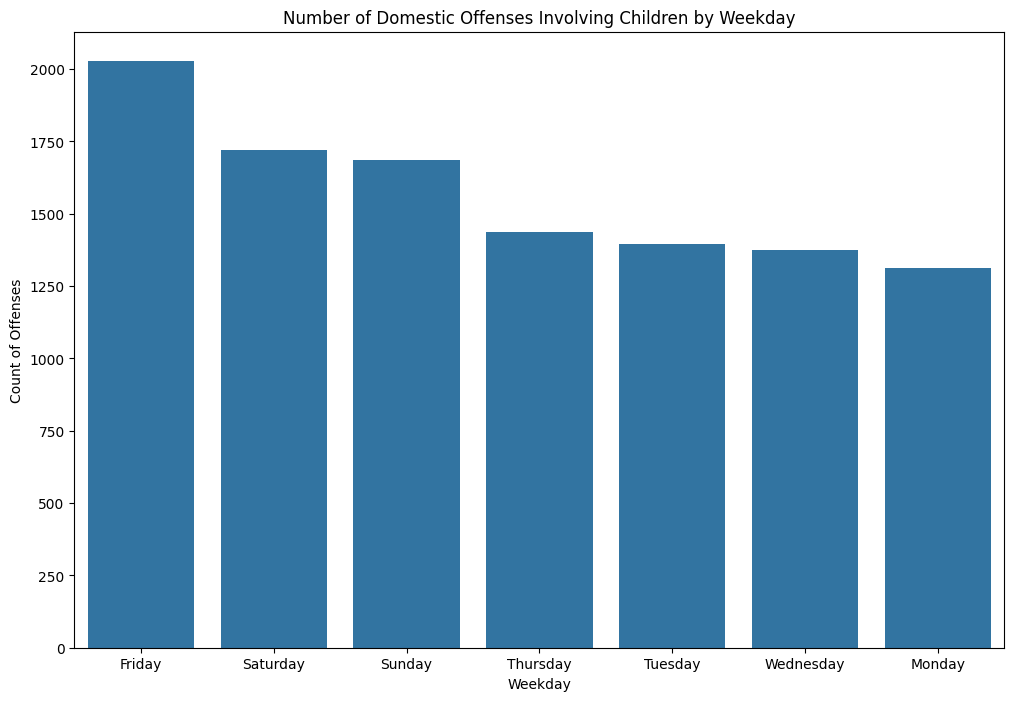

In [13]:
domestic_crime_filter = chicago_crime_2008_to_2012_df["Domestic"] == True
domestic_crime_count = chicago_crime_2008_to_2012_df[domestic_crime_filter].value_counts().sum()
print(f"The number of recorded crimes that are domestic is: {domestic_crime_count}")

domestic_offense_children = chicago_crime_2008_to_2012_df.query("`Domestic` == True and `Primary Type` == 'OFFENSE INVOLVING CHILDREN'")
domestic_offense_children_count = domestic_offense_children.shape[0]
print(f"The number of domestic recorded crimes that are of the primary type *offense involving children* is: {domestic_offense_children_count}")

domestic_true = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Domestic"] == True].shape[0]
domestic_false = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Domestic"] == False].shape[0]
domestic_percentage = (domestic_true / (domestic_true + domestic_false)) * 100

print(f"It's less likely that an offense involving children is domestic, the percentage of it being domestic is: {domestic_percentage:.2f}%")


domestic_offense_children["Weekday"] = domestic_offense_children["Date"].dt.day_name()
weekday_domestic_offense_children_count = domestic_offense_children["Weekday"].value_counts()
weekday_domestic_offense_children_df = weekday_domestic_offense_children_count.reset_index()
weekday_domestic_offense_children_df.columns = ["Weekday", "Count"]

plt.figure(figsize=(12, 8))
sns.barplot(data=weekday_domestic_offense_children_df, x="Weekday", y="Count")
plt.title("Number of Domestic Offenses Involving Children by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Count of Offenses")
plt.show()

In [14]:
total_offenses = weekday_domestic_offense_children_count.sum()
weekday_domestic_offense_children_percentage = ((weekday_domestic_offense_children_count / total_offenses) * 100).round(2)
print(f"Percentage of weekdays of domestic offenses involving children: {weekday_domestic_offense_children_percentage}")
description_sex_filter =chicago_crime_2008_to_2012_df["Description"].str.contains("sex", flags=re.IGNORECASE)
description_child_filter =chicago_crime_2008_to_2012_df["Description"].str.contains("child", flags=re.IGNORECASE)

descrip_child_sex_filter = chicago_crime_2008_to_2012_df[description_sex_filter & description_child_filter][["Description", "Arrest"]]
crime_arrest_dist = descrip_child_sex_filter.groupby("Description").agg(total_cases = ("Arrest", "size"), arrests = ("Arrest","sum"))
crime_arrest_dist["arrest_rate"] = ((crime_arrest_dist["arrests"] / crime_arrest_dist["total_cases"]) * 100).round(2)

print(crime_arrest_dist)

Percentage of weekdays of domestic offenses involving children: Weekday
Friday       18.51
Saturday     15.70
Sunday       15.39
Thursday     13.13
Tuesday      12.74
Wednesday    12.55
Monday       11.97
Name: count, dtype: float64
                                                    total_cases  arrests  \
Description                                                                
AGG SEX ASSLT OF CHILD FAM MBR                              612      173   
AGGRAVATED SEXUAL ASSAULT OF CHILD BY FAMILY ME...          158       52   
SEX ASSLT OF CHILD BY FAM MBR                               336       71   
SEXUAL ASSAULT OF CHILD BY FAMILY MEMBER                     63       15   
SEXUAL EXPLOITATION OF A CHILD                              190       43   

                                                    arrest_rate  
Description                                                      
AGG SEX ASSLT OF CHILD FAM MBR                            28.27  
AGGRAVATED SEXUAL ASSAULT OF CHILD B

In [15]:
crimes_filter = chicago_crime_2008_to_2012_df[description_sex_filter & description_child_filter]
most_arrest_desc = (crimes_filter.groupby("Description")["Arrest"].sum().idxmax())
specific_crime_filter = crimes_filter[crimes_filter["Description"] == most_arrest_desc]
specific_crime_filter["Weekday"] = specific_crime_filter["Date"].dt.day_name()
time_distribution = specific_crime_filter.groupby(["Weekday", "Hour"]).agg(total_cases = ("Arrest", "size"), total_arrests = ("Arrest", "sum")).reset_index()
time_distribution["Arrest Rate"] = (time_distribution["total_arrests"] / time_distribution["total_cases"]) * 100
worst_periods = time_distribution.sort_values(by=["total_arrests", "Arrest Rate"], ascending=False)
for day in time_distribution["Weekday"].unique():
    print(f"\n### {day}:")
    print(time_distribution[time_distribution["Weekday"] == day].sort_values(by="Hour"))

print("\n### Worst Periods of the Week:")
print(worst_periods.head(10).to_string(index=False))


### Friday:
   Weekday  Hour  total_cases  total_arrests  Arrest Rate
0   Friday     0           56              9    16.071429
1   Friday     1            1              1   100.000000
2   Friday     2            2              0     0.000000
3   Friday     7            3              0     0.000000
4   Friday     8            4              0     0.000000
5   Friday     9            2              2   100.000000
6   Friday    10            2              0     0.000000
7   Friday    12            6              1    16.666667
8   Friday    13            4              2    50.000000
9   Friday    14            4              3    75.000000
10  Friday    15            5              2    40.000000
11  Friday    16            1              0     0.000000
12  Friday    17            2              0     0.000000
13  Friday    18            8              1    12.500000
14  Friday    19            1              0     0.000000
15  Friday    20            5              1    20.000000
1

Worst Periods per Year:
     Year  Month  Hour  total_cases  total_arrests  Arrest Rate
0    2008      1     0           34              6    17.647059
129  2009      1     0           29              6    20.689655
254  2010      1     0           50             10    20.000000
375  2011      1     0           37              7    18.918919
478  2012      1     0           37             11    29.729730


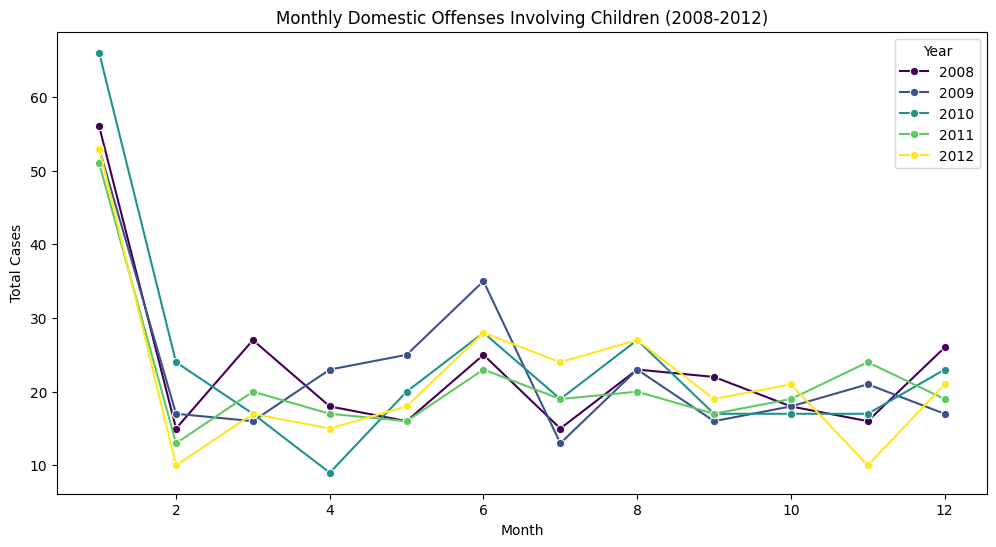

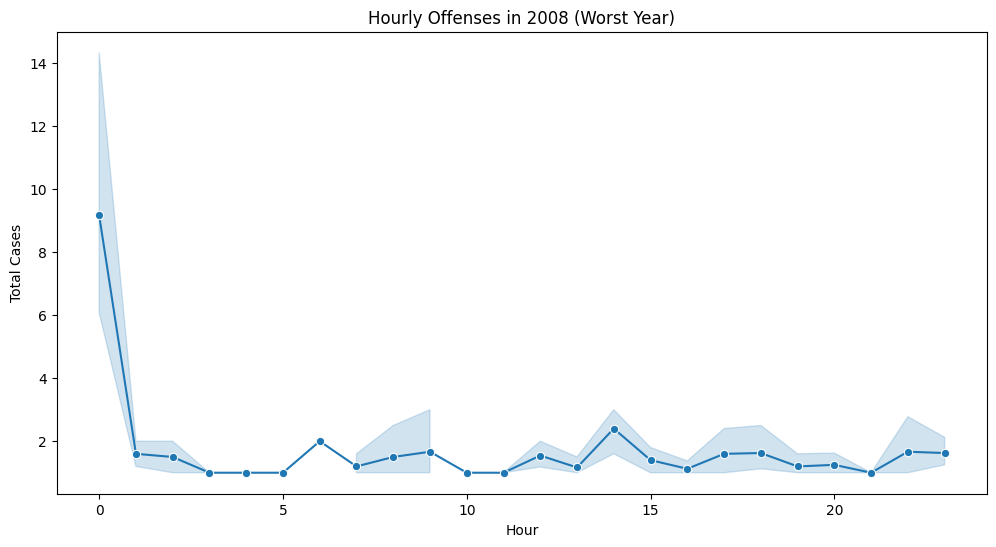

In [28]:
yearly_trends = chicago_crime_2008_to_2012_df[description_sex_filter & description_child_filter] \
    .groupby(["Year", "Month", "Hour"]).agg(total_cases=("ID", "size"),total_arrests=("Arrest", "sum")).reset_index()

yearly_trends["Arrest Rate"] = (yearly_trends["total_arrests"] / yearly_trends["total_cases"]) * 100
worst_periods_per_year = yearly_trends.sort_values(by=["Year", "total_cases"], ascending=[True, False]) \
    .groupby("Year").head(1)
print("Worst Periods per Year:")
print(worst_periods_per_year)

yearly_trends_without_hour = chicago_crime_2008_to_2012_df[description_sex_filter & description_child_filter] \
    .groupby(["Year", "Month" ]).agg(total_cases=("ID", "size"),).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends_without_hour, x="Month", y="total_cases", hue="Year", marker="o", palette="viridis")
plt.title("Monthly Domestic Offenses Involving Children (2008-2012)")
plt.xlabel("Month")
plt.ylabel("Total Cases")
plt.legend(title="Year")
plt.show()

worst_year = worst_periods_per_year["Year"].iloc[0]
worst_year_data = yearly_trends[yearly_trends["Year"] == worst_year]

plt.figure(figsize=(12, 6))
sns.lineplot(data=worst_year_data, x="Hour", y="total_cases", marker="o")
plt.title(f"Hourly Offenses in {worst_year} (Worst Year)")
plt.xlabel("Hour")
plt.ylabel("Total Cases")
plt.show()


# 6 - Bad Boys Bad Boys whatcha gonna do

**6.1** In general, what weekday is a crime most likely to occur? Which day is the safest?

<font color = "green"> The weekday that most likely a crime would occur seems to be Friday with the most total cases (284113). And the safest day would be Sunday with the lowest total cases (251382).</font>

**6.2** Which is the most unsafe weekday for you if you'd like to avoid the following:

a) getting your phone stolen by sneaky pickpockets (THEFT) 

b) having your handbag forcibly pulled away (ROBBERY) 

c) getting jumped in an alley (ASSAULT)

<font color="green"><p>a)The most unsafe weekday if you want to avoid THEFT is Friday with total cases of 61648</p>
<p>b)The most unsafe weekday if you want to avoid ROBBERY is Friday with total cases of 10975</p>
<p>c)The most unsafe weekday if you want to avoid ASSAULT is Wednesday with total cases of 16969</p></font>

**6.3** Which are the worst 10 dates (most recorded crimes) of 2008? Does this trend hold for the other years?

<font color = "green"> The 10 worst dates of 2008 are: 
<ul>
    <li>2008-01-01 with (1831) total cases</li>
    <li>2008-01-01 with (1531) total cases</li>
    <li>2008-11-01 with (1480) total cases</li>
    <li>2008-09-01 with (1469) total cases</li>
    <li>2008-10-10 with (1453) total cases</li>
    <li>2008-05-01 with (1450) total cases</li>
    <li>2008-10-31 with (1444) total cases</li>
    <li>2008-08-22 with (1440) total cases</li>
    <li>2008-06-01 with (1438) total cases</li>
    <li>2008-08-15 with (1436) total cases</li>
</ul>

There is some dates that are recurrent over the years... (yy-01-01), (yy-08-01 except 2011), (yy-09-01 except 2009) and also that there seem to be more crimes over the years during the summer months except for new years which is holds the most crimes "day" overall.
</font>

**6.4** From the perspective of total number of crime records, which are the Top 10 primary crime types? Which are the Bottom 10? 

Consider this question for the years 2008-2012 as a whole. 

<font color = "green">The 10 top primary crime types (2008 -2012) with the most total number of crime records are:
<ol>
<li>THEFT    -   396788</li>
<li>BATTERY   -    329384</li>
<li>CRIMINAL DAMAGE  -   214408</li>
<li>NARCOTICS   -    207541</li>
<li>BURGLARY    -  128871</li>
<li>OTHER OFFENSE    -   111875</li>
<li>ASSAULT    -   110156</li>
<li>MOTOR VEHICLE THEFT    -    89270</li>
<li>ROBBERY    -    74426</li>
<li> DECEPTIVE PRACTICE     -   67915</li>
</ol>
<p>The Bottom 10 primary crime types (2008 -2012) with the least total number of crime records are:</p>
<ol>
<li>KIDNAPPING     -    1467</li>
<li>INTIMIDATION    -    1017</li>
<li>STALKING     -     935</li>
<li>CRIMINAL SEXUAL ASSAULT    -     325</li>
<li>OBSCENITY     -     134</li>
<li>PUBLIC INDECENCY      -     51</li>
<li>OTHER NARCOTIC VIOLATION      -     36</li>
<li>NON-CRIMINAL     -     8</li>
<li>NON-CRIMINAL (SUBJECT SPECIFIED)    -    2</li>
<li>HUMAN TRAFFICKING     -     1</li>
</ol>
</font>

**6.5** For all those crime categories you identified in 6.4, how does their distribution instead look per year - rather than the full 2008-2012 period as a whole?

<font color="green">Most of the top-10 primary types have decreased over the years some have increased or stayed stable but decreased 2012. For the bottom-10 primary types less have decreased, the ones that have increased:<p> "STALKING" that decreased first over the year but in 2012 incresed higher then the all the other years.</p><p>"CRIMINAL SEXUAL ASSAULT" have increased since 2008.</p><p>"OBSCENITY" have increased and dubbled if you comparre 2008 to 2012</p><p>"PUBLIC INDECENCY" have increased since 2008.</p><p>"NON-CRIMINAL" that is first seen in 2009 and have increased in 2012.</p><p>"NON-CRIMINAL (SUBJECT SPECIFIED)" also a new Primary Type that is only in 2012</p>

**6.6** Which primary crime types does the city of Chicago seem to get better at preventing? For which ones is it the opposite, i.e, the situation is getting worse? 

<font color="green">The primary crimes that Chicago have gotten better at preventing are mostly the ones in the top-10: 
<ul>
    <li>ASSAULT</li>
    <li>BATTERY</li>
    <li>BURGLARY</li>
    <li>CRIMINAL DAMAGE</li>
    <li>DECEPTIVE PRACTICE</li>
    <li>MOTOR VEHICLE THEFT </li>
    <li>NARCOTICS</li>
    <li>OTHER OFFENSE</li>
    <li>ROBBERY</li>
    <li>THEFT</li>
</ul>
<p>The primary crimes that Chicago have gotten better at preventing in the bottom-10: </p>
<ul>
    <li>INTIMIDATION</li>
    <li>KIDNAPPING</li>
    <li>OTHER NARCOTIC VIOLATION</li>
    <li>HUMAN TRAFFICKING</li>
</ul>
<p>The primary crimes that Chicago have gotten worse at preventing are the ones I have in my answer in 6.5.</p>
</font>

In [17]:
chicago_crime_2008_to_2012_df["Weekday"] = chicago_crime_2008_to_2012_df["Date"].dt.day_name()
weekday_crime_data = chicago_crime_2008_to_2012_df.groupby("Weekday")["ID"].agg(total_cases=("size")).reset_index()
weekday_crime_data = weekday_crime_data.sort_values(by="total_cases", ascending = False)
print(weekday_crime_data)

     Weekday  total_cases
0     Friday       284113
6  Wednesday       273628
5    Tuesday       271301
4   Thursday       269174
2   Saturday       266336
1     Monday       263017
3     Sunday       251382


The most unsafe weekday if you want to avoid THEFT is Friday with total cases of 61648
The most unsafe weekday if you want to avoid ROBBERY is Friday with total cases of 10975
The most unsafe weekday if you want to avoid ASSAULT is Wednesday with total cases of 16969


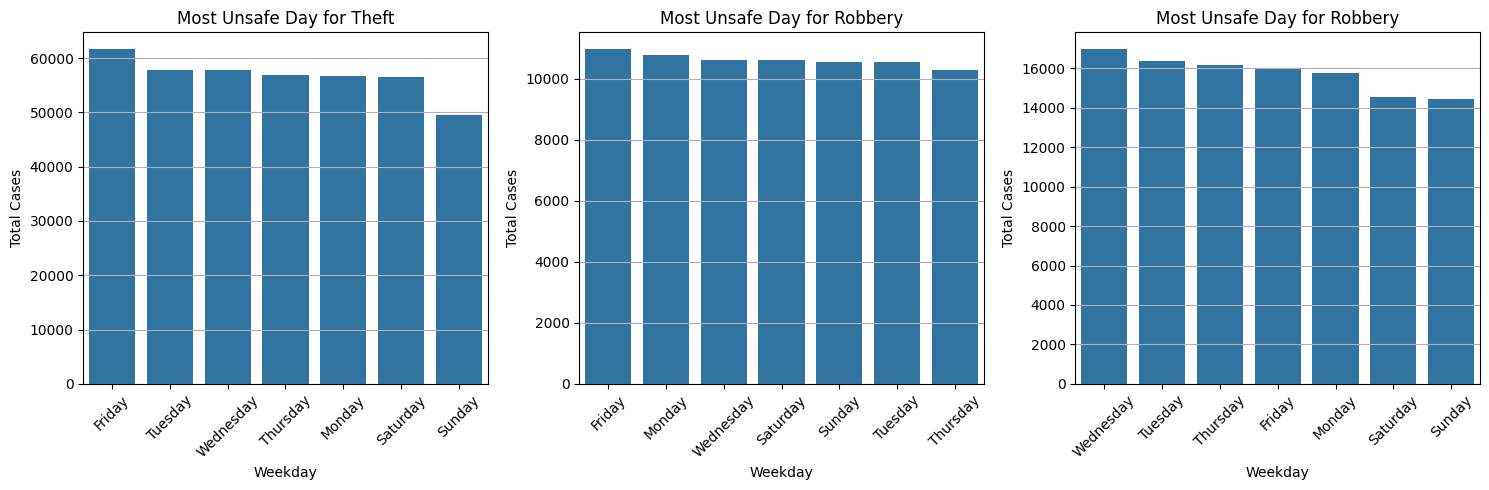

In [18]:
crimes_per_weekday_filter = chicago_crime_2008_to_2012_df.groupby(["Primary Type", "Weekday"]).size().unstack(fill_value=0)
theft_per_weekday = crimes_per_weekday_filter.loc["THEFT"].sort_values(ascending=False)
most_unsafe_theft_day = theft_per_weekday.head(1)
print(f"The most unsafe weekday if you want to avoid {most_unsafe_theft_day.name} is {most_unsafe_theft_day.index[0]} with total cases of {most_unsafe_theft_day.values[0]}")

robbery_per_weekday = crimes_per_weekday_filter.loc["ROBBERY"].sort_values(ascending=False)
most_unsafe_robbery_day = robbery_per_weekday.head(1)
print(f"The most unsafe weekday if you want to avoid {most_unsafe_robbery_day.name} is {most_unsafe_robbery_day.index[0]} with total cases of {most_unsafe_robbery_day.values[0]}")

assault_per_weekday = crimes_per_weekday_filter.loc["ASSAULT"].sort_values(ascending=False)
most_unsafe_assault_day = assault_per_weekday.head(1)
print(f"The most unsafe weekday if you want to avoid {most_unsafe_assault_day.name} is {most_unsafe_assault_day.index[0]} with total cases of {most_unsafe_assault_day.values[0]}")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.barplot(ax=axes[0], x=theft_per_weekday.index, y=theft_per_weekday.values)
axes[0].grid(True, axis="y")
axes[0].set_title("Most Unsafe Day for Theft")
axes[0].set_xlabel("Weekday")
axes[0].set_ylabel("Total Cases")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45)
sns.barplot(ax=axes[1], x=robbery_per_weekday.index, y=robbery_per_weekday.values)
axes[1].grid(True, axis="y")
axes[1].set_title("Most Unsafe Day for Robbery")
axes[1].set_xlabel("Weekday")
axes[1].set_ylabel("Total Cases")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)
sns.barplot(ax=axes[2], x=assault_per_weekday.index, y=assault_per_weekday.values)
axes[2].grid(True, axis="y")
axes[2].set_title("Most Unsafe Day for Robbery")
axes[2].set_xlabel("Weekday")
axes[2].set_ylabel("Total Cases")
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

     Date Only  total_cases  Year
0   2008-01-01         1831  2008
1   2008-08-01         1531  2008
2   2008-11-01         1480  2008
3   2008-09-01         1469  2008
4   2008-10-10         1453  2008
5   2008-05-01         1450  2008
6   2008-10-31         1444  2008
7   2008-08-22         1440  2008
8   2008-06-01         1438  2008
9   2008-08-15         1436  2008
10  2009-01-01         1842  2009
11  2009-05-01         1355  2009
12  2009-08-01         1344  2009
13  2009-07-01         1326  2009
14  2009-06-01         1308  2009
15  2009-08-18         1308  2009
16  2009-06-12         1304  2009
17  2009-09-11         1286  2009
18  2009-06-27         1273  2009
19  2009-04-17         1269  2009
20  2010-01-01         1474  2010
21  2010-06-01         1306  2010
22  2010-04-01         1265  2010
23  2010-07-01         1260  2010
24  2010-05-05         1257  2010
25  2010-04-15         1256  2010
26  2010-10-01         1241  2010
27  2010-06-10         1232  2010
28  2010-09-01

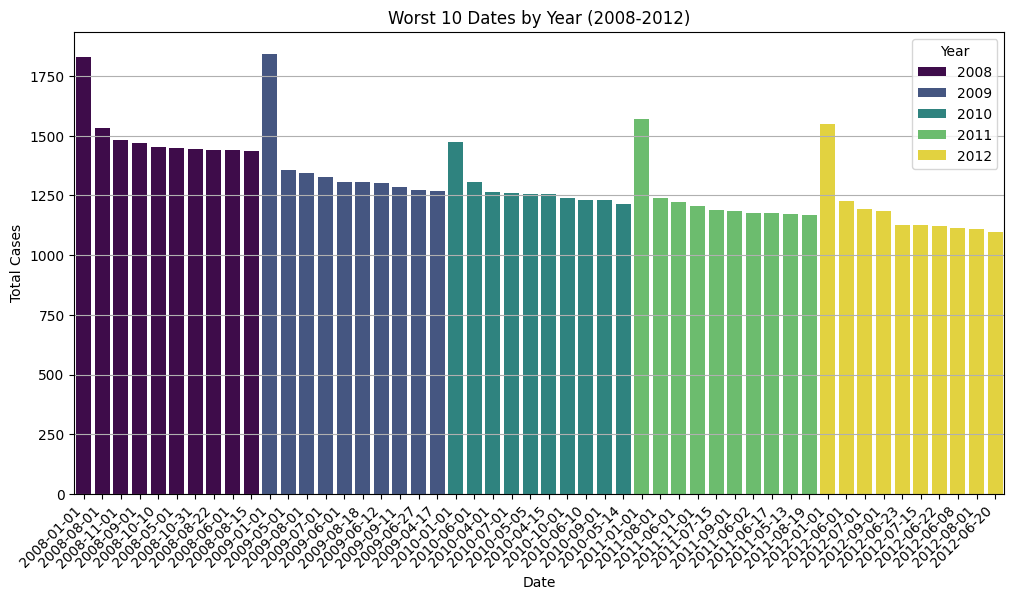

In [19]:
chicago_crime_2008_to_2012_df["Date Only"] = chicago_crime_2008_to_2012_df["Date"].dt.date

def get_worst_dates(year, data):
    year_data = data[data["Year"] == year]
    daily_data = year_data.groupby("Date Only")["ID"].size().reset_index(name="total_cases")
    worst_dates = daily_data.sort_values(by="total_cases", ascending=False).head(10)
    worst_dates["Year"] = year
    return worst_dates

all_years_data = []
for year in range(2008, 2013):
    result = get_worst_dates(year, chicago_crime_2008_to_2012_df)
    all_years_data.append(result)

combined_worst_dates = pd.concat(all_years_data, ignore_index=True)
print(combined_worst_dates)

plt.figure(figsize=(12, 6))
sns.barplot(data=combined_worst_dates, x="Date Only", y="total_cases", hue="Year", palette="viridis")
plt.title("Worst 10 Dates by Year (2008-2012)")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.legend(title="Year")
plt.show()


In [43]:
primary_type_total = chicago_crime_2008_to_2012_df.groupby("Primary Type")["ID"].agg(total_cases=("size")).reset_index()
primary_type_total_sorted = primary_type_total.sort_values(by="total_cases", ascending=False).reset_index(drop=True)
top_10_primary = primary_type_total_sorted.head(10)
bottom_10_primary = primary_type_total_sorted.tail(10)
print(top_10_primary)
print(bottom_10_primary)

          Primary Type  total_cases
0                THEFT       396788
1              BATTERY       329384
2      CRIMINAL DAMAGE       214408
3            NARCOTICS       207541
4             BURGLARY       128871
5        OTHER OFFENSE       111875
6              ASSAULT       110156
7  MOTOR VEHICLE THEFT        89270
8              ROBBERY        74426
9   DECEPTIVE PRACTICE        67915
                        Primary Type  total_cases
22                        KIDNAPPING         1467
23                      INTIMIDATION         1017
24                          STALKING          935
25           CRIMINAL SEXUAL ASSAULT          325
26                         OBSCENITY          134
27                  PUBLIC INDECENCY           51
28          OTHER NARCOTIC VIOLATION           36
29                      NON-CRIMINAL            8
30  NON-CRIMINAL (SUBJECT SPECIFIED)            2
31                 HUMAN TRAFFICKING            1


     Year         Primary Type  total_cases
1    2008              ASSAULT        25448
2    2008              BATTERY        75930
3    2008             BURGLARY        26218
5    2008      CRIMINAL DAMAGE        52843
8    2008   DECEPTIVE PRACTICE        14936
15   2008  MOTOR VEHICLE THEFT        18881
16   2008            NARCOTICS        46506
20   2008        OTHER OFFENSE        26532
24   2008              ROBBERY        16703
27   2008                THEFT        88437
30   2009              ASSAULT        22861
31   2009              BATTERY        68459
32   2009             BURGLARY        26767
34   2009      CRIMINAL DAMAGE        47725
37   2009   DECEPTIVE PRACTICE        13885
44   2009  MOTOR VEHICLE THEFT        15482
45   2009            NARCOTICS        43543
50   2009        OTHER OFFENSE        25601
54   2009              ROBBERY        15981
57   2009                THEFT        80976
60   2010              ASSAULT        21537
61   2010              BATTERY  

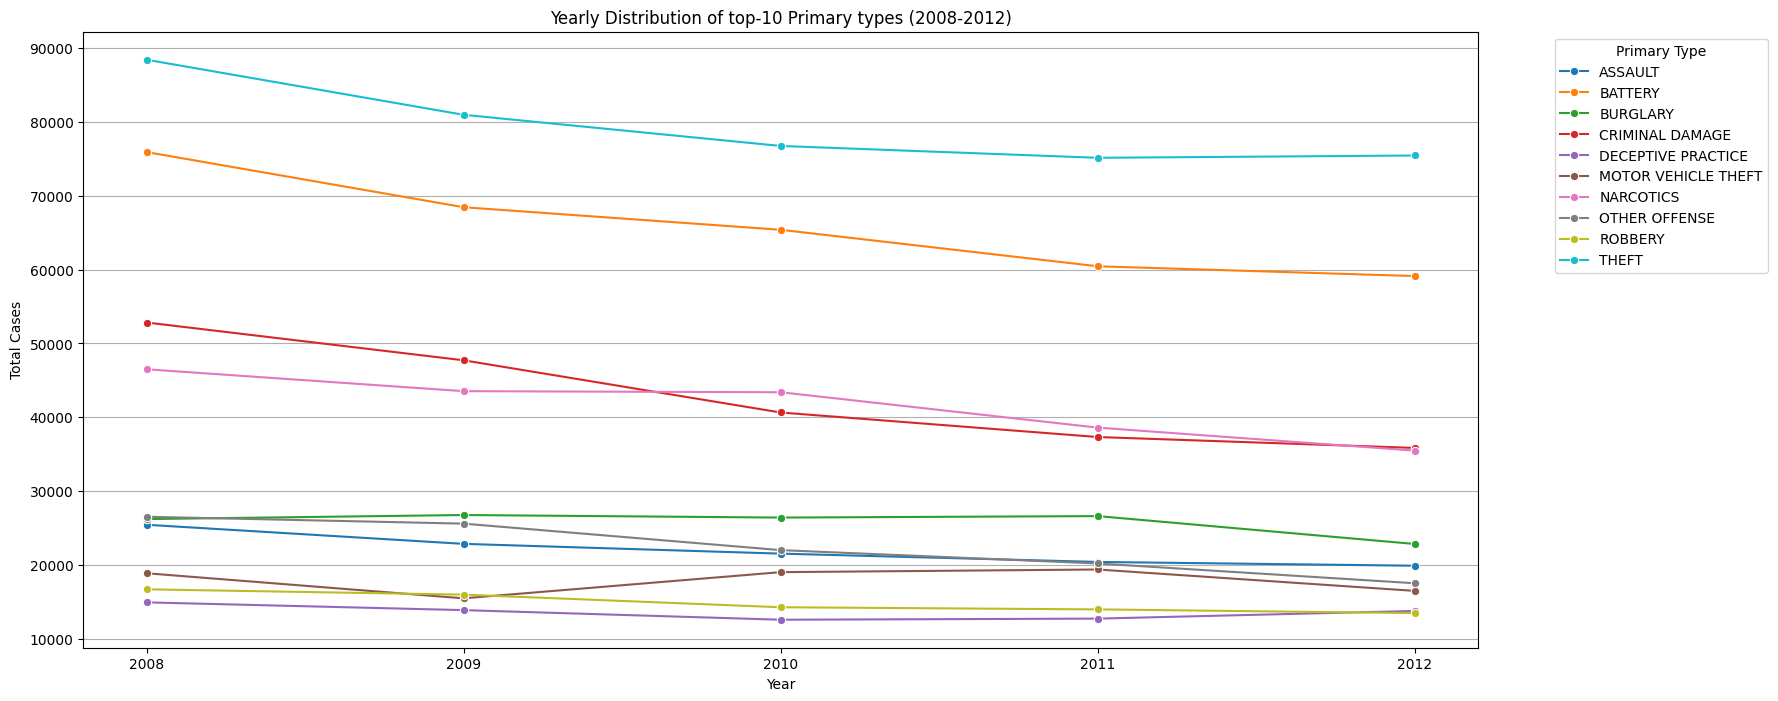

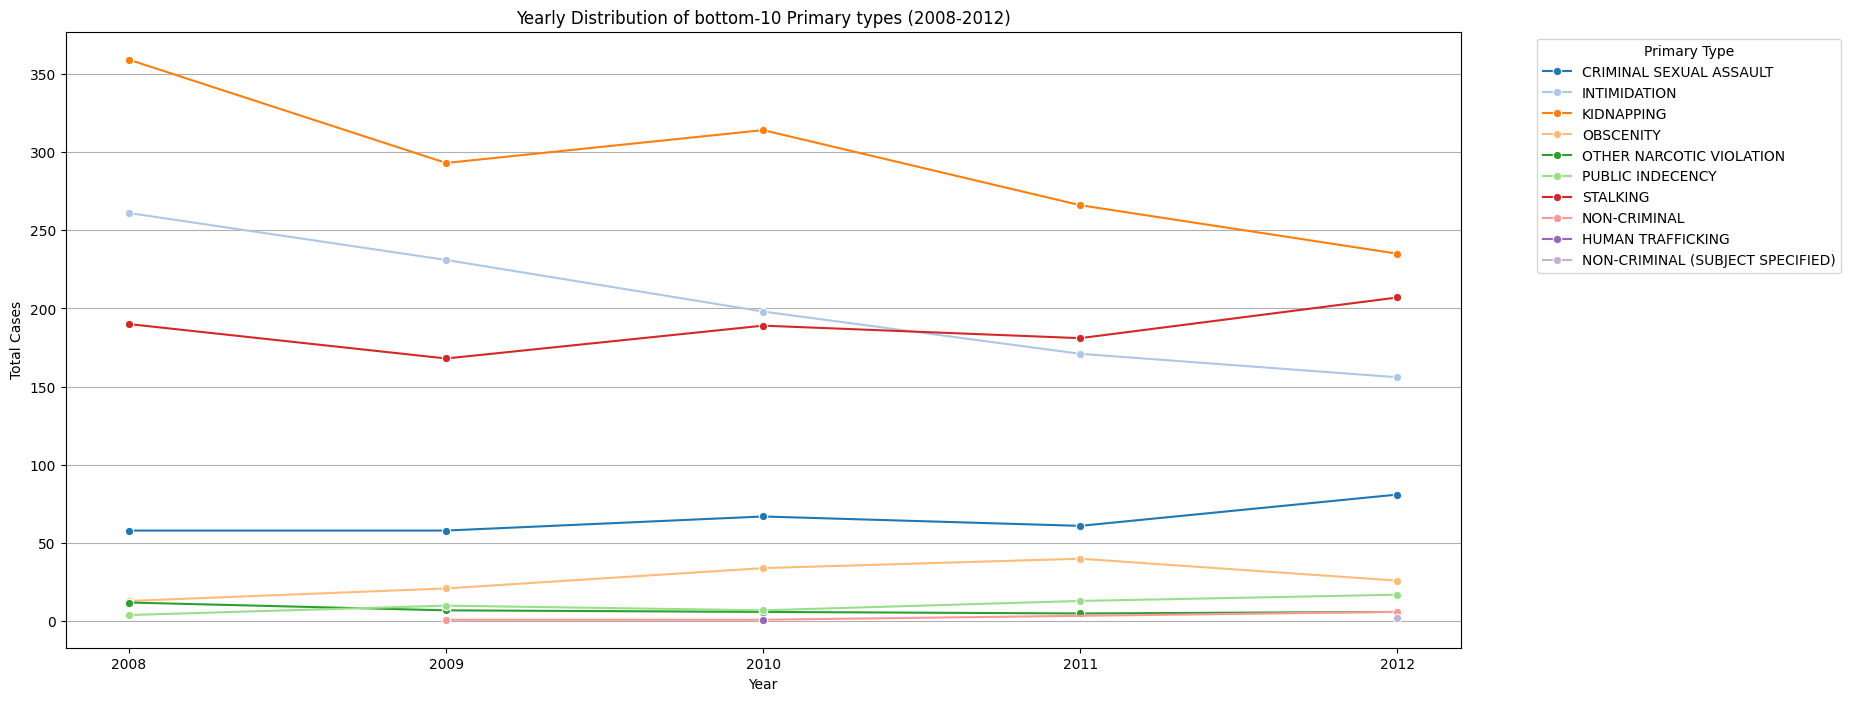

In [72]:
yearly_crime_distribution = chicago_crime_2008_to_2012_df.groupby(["Year", "Primary Type"])["ID"].size().reset_index(name="total_cases")
top_10_types = top_10_primary["Primary Type"].tolist()
bottom_10_types = bottom_10_primary["Primary Type"].tolist()

top_10_distribution = yearly_crime_distribution[yearly_crime_distribution["Primary Type"].isin(top_10_types)]
bottom_10_distribution = yearly_crime_distribution[yearly_crime_distribution["Primary Type"].isin(bottom_10_types)]
print(top_10_distribution)
print(bottom_10_distribution)
plt.figure(figsize=(18, 8))
sns.lineplot(data=top_10_distribution, x="Year", y="total_cases", hue="Primary Type",marker ="o", palette="tab10")
plt.title("Yearly Distribution of top-10 Primary types (2008-2012)")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")
plt.xticks(ticks=top_10_distribution["Year"].unique())
plt.show()

plt.figure(figsize=(18, 8))
sns.lineplot(data=bottom_10_distribution, x="Year", y="total_cases", hue="Primary Type",marker ="o", palette="tab20")
plt.title("Yearly Distribution of bottom-10 Primary types (2008-2012)")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.legend(title="Primary Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(axis="y")
plt.xticks(ticks=bottom_10_distribution["Year"].unique())
plt.show()

# 7 - Night Stalker

**7.1** Are there more or less crimes reported during daytime, compared with nighttime? Daytime is considered as all hours between 06:00-18:00, nighttime is the rest of the day.

<font color="green"> There are 1063345 crimes reported during the day and 815606 during the night.
<p>There are more crimes reported during the day compared to the night</p></font>

**7.2** Are there any specific primary crime types that most often occur during nights? Which ones are they?

<font color="green">There are som specific primary crimes that most often occur during the nights. They are:
<ul>
    <li>CRIMINAL DAMAGE</li>
    <li>WEAPONS VIOLATION</li>
    <li>ROBBERY</li>
    <li>PROSTITUTION</li>
    <li>CRIM SEXUAL ASSAULT</li>
    <li>LIQUOR LAW VIOLATION</li>
    <li>ARSON</li>
    <li>INTERFERENCE WITH PUBLIC OFFICER</li>
    <li>MOTOR VEHICLE THEFT</li>
    <li>HOMICIDE</li>
</ul>



**7.3** In general, for each weekday, how many crimes are recorded during daytime and how many during nighttime? What are the trends? Are there any weekdays that stands out somehow?

<font color="green">
<p>Monday:{Day:156404, Night:156404, Day-Night Difference:49791}</p>
<p>Tuesday:{Day:162269, Night:109032, Day-Night Difference:53237}</p>
<p>Wednesday:{Day:164154, Night:109474, Day-Night Difference:54680}</p>
<p>Thursday:{Day:159522, Night:109652, Day-Night Difference:49870}</p>
<p>Friday:{Day:163995, Night:120118, Day-Night Difference:43877}</p>
<p>Saturday:{Day:134126, Night:132210, Day-Night Difference:1916}</p>
<p>Sunday:{Day:122875, Night:128507, Day-Night Difference:-5632}</p>
<p>The trends shows that Mondays have the highest total amount of crimes. The total crime amount is almost the same on Tuesday, Wednesday, Thursday, Saturday and Sunday, but there is a small increase on Friday.The weekdays that stands out: seems to be that it's less difference between day- and nighttime crimes on Saturday. On Sunday there seem to be more crimes during nighttime than daytime. Mondays have the most total amount of crimes.</p></font>

Monday, Tuesday, Wednesday, Thursday and Friday have overwhelmingly more recorded crimes during the day, than during the night.

Saturday also has more records during the day, but it's only slightly more than durnig the night.

Sunday is a trend breaker - wherein the number of recorded crimes are higher during the night, than during the night. Though not by alot.

**7.4** Does the trends you've found in 7.3 also hold if you look at each year individually?

<font color="green">Saturdays nighttime crimes were in 2008 higher than the daytime but it have been decreasing over the years to become lower than the daytime crimes. Sundays nighttime crime were musch higher difference from daytime crimes but are decreasing over the years. But overall the amount of crimes during the day and night have been decreaing over the years.</font>

**7.5** Are there any weekdays in which Stalking occurs more often during nighttime?

<font color="green">There doesn't seem to be any weekdays where stalking occurs more during nighttime than daytime but there is a higher percentage for nighttime stalking on Saturdays and Sundays compared to the rest of the weekdays. Also the total amount of stalkingcases during Saturdays and Sundays are lower than the rest of the week.</font>

In [145]:
day_time = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Hour"].between(6, 18, inclusive="both")]
night_time = chicago_crime_2008_to_2012_df[~chicago_crime_2008_to_2012_df["Hour"].between(6, 18, inclusive="both")]
day_time_count = day_time.shape[0]
night_time_count = night_time.shape[0]
print(f"There are {day_time_count} crimes reported during the day and {night_time_count} during the night.")
if day_time_count > night_time_count:
    print("There are more crimes reported during the day compared to the night.")
elif day_time_count < night_time_count:
    print("There are more crimes reported during the night compared to the day.")
else:
    print("The number of crimes reported during the day and night are equal.")

night_crimes = night_time.groupby("Primary Type")["ID"].agg(total_cases=("size")).reset_index()
night_crimes_sorted = night_crimes.sort_values(by="total_cases", ascending=False).reset_index(drop=True)

day_crimes = day_time.groupby("Primary Type")["ID"].agg(total_cases=("size")).reset_index()
day_crimes_sorted = day_crimes.sort_values(by="total_cases", ascending=False).reset_index(drop=True)

crime_comparison = pd.merge(night_crimes_sorted, day_crimes_sorted, on="Primary Type", how="outer", suffixes=("_night", "_day"))
crime_comparison.fillna(0, inplace=True)
crime_comparison["Nigh & Day Difference"] = crime_comparison["total_cases_night"] - crime_comparison["total_cases_day"]
night_cases_dominant = crime_comparison.sort_values(by="Nigh & Day Difference", ascending=False).reset_index(drop=True)
top_10_dominant_night = night_cases_dominant.head(10)
top_10_dominant_night


There are 1063345 crimes reported during the day and 815606 during the night.
There are more crimes reported during the day compared to the night.


,Primary Type,total_cases_night,total_cases_day,Nigh & Day Difference
0,CRIMINAL DAMAGE,113441,100967.0,12474.0
1,WEAPONS VIOLATION,11616,7911.0,3705.0
2,ROBBERY,38698,35728.0,2970.0
3,PROSTITUTION,9232,6961.0,2271.0
4,CRIM SEXUAL ASSAULT,4533,2525.0,2008.0
5,LIQUOR LAW VIOLATION,2495,1092.0,1403.0
6,ARSON,1962,793.0,1169.0
7,INTERFERENCE WITH PUBLIC OFFICER,2488,1737.0,751.0
8,MOTOR VEHICLE THEFT,44941,44329.0,612.0
9,HOMICIDE,1396,969.0,427.0


In [165]:
chicago_crime_2008_to_2012_df["Day Or Night"] = np.where(chicago_crime_2008_to_2012_df["Hour"].between(6, 18),"Day", "Night")
weekday_time_counts = chicago_crime_2008_to_2012_df.groupby(["Weekday", "Day Or Night"])["ID"].size().reset_index(name="total_cases")
weekday_comparison = weekday_time_counts.pivot(index="Weekday", columns="Day Or Night", values="total_cases").reset_index()
weekday_comparison["Day-Night Difference"] = (weekday_comparison["Day"] - weekday_comparison["Night"])
print(weekday_comparison)

weekday_yearly_counts = chicago_crime_2008_to_2012_df.groupby(["Year", "Weekday", "Day Or Night"])["ID"].size().reset_index(name="total_cases")
weekday_yearly_comparison = weekday_yearly_counts.pivot_table(index=["Year", "Weekday"], columns="Day Or Night", values="total_cases", aggfunc="sum").reset_index()
weekday_yearly_comparison["Day-Night Difference"] = weekday_yearly_comparison["Day"] - weekday_yearly_comparison["Night"]
weekday_yearly_comparison


Day Or Night    Weekday     Day   Night  Day-Night Difference
0                Friday  163995  120118                 43877
1                Monday  156404  106613                 49791
2              Saturday  134126  132210                  1916
3                Sunday  122875  128507                 -5632
4              Thursday  159522  109652                 49870
5               Tuesday  162269  109032                 53237
6             Wednesday  164154  109474                 54680


Day Or Night,Year,Weekday,Day,Night,Day-Night Difference
0,2008,Friday,36171,28517,7654
1,2008,Monday,34527,24920,9607
2,2008,Saturday,29976,30984,-1008
3,2008,Sunday,27151,29575,-2424
4,2008,Thursday,35060,25072,9988
5,2008,Tuesday,36144,26335,9809
6,2008,Wednesday,36853,25913,10940
7,2009,Friday,34058,25077,8981
8,2009,Monday,32226,22062,10164
9,2009,Saturday,27698,27602,96


In [172]:
stalking_data = chicago_crime_2008_to_2012_df[chicago_crime_2008_to_2012_df["Primary Type"] == "STALKING"]
stalking_counts = stalking_data.groupby(["Weekday", "Day Or Night"])["ID"].size().reset_index(name="stalking_cases")
stalking_comparison = stalking_counts.pivot(index="Weekday", columns="Day Or Night", values="stalking_cases").reset_index()
stalking_comparison["Night Percentage"] = (stalking_comparison["Night"] /( stalking_comparison["Day"] + stalking_comparison["Night"])) * 100
stalking_comparison["Night Dominates"] = stalking_comparison["Night"] > stalking_comparison["Day"]
print(stalking_comparison)


Day Or Night    Weekday  Day  Night  Night Percentage  Night Dominates
0                Friday   88     47         34.814815            False
1                Monday  100     51         33.774834            False
2              Saturday   59     45         43.269231            False
3                Sunday   61     41         40.196078            False
4              Thursday   92     47         33.812950            False
5               Tuesday  107     48         30.967742            False
6             Wednesday  104     45         30.201342            False


# 8 - Grand Theft Auto

**8.1** You just bought a new car. What weekday should you be most wary of as it has the highest risk for a Grand Theft Auto-style robbery (MOTOR VEHICLE THEFT)?

**8.2** For that day, where (at what location) should you absolutely avoid leave your car carelessly? Where is it seemingly safest to do so?

**8.3*** Are there certain periods of the year/month/day/time of day where GTA is more frequent?

# 9. Just send me like location

https://www.youtube.com/watch?v=k7yBJ5Ffkdo

**9.1** Are there any (geographical) areas hit particularly hard by prostitution on friday nights?

**9.2** Can you vizualise the locations from 9.1 on a map of Chicago? Is there a concentration somewhere? 

**9.3*** Can you find any geographical concentration of other crime categories? Perhaps even by weekday and or day/nighttime? Plot these on a map of Chicago. 

# 10 - The $ factor

**10.1** Merge the crime and census datasets together in a suitable way.

**10.2*** Are there certain kinds of socoeconomic area that are more prone to certain kinds of crimes? Do a deep dive in the direction you fancy yourself here.

# 11 - Your turn!

There are obviously so much more to gain by analysing these datasets. This is now your opportunity to dwelve deeper into what you yourself like.

    Instructions: think of one or several questions (as we've done above). Then, proceed with your own deep dive analysis and provide your answers.